In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
data =pd.read_csv("/Users/om/Desktop/My Mac/My_Assignment Data/forestfires copy.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## `EDA`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### `Unique Size Category`

In [5]:
data.size_category.unique()

array(['small', 'large'], dtype=object)

### `Total Count of Size Category`

In [6]:
data["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

### `Checking if any duplicated records`

In [7]:
data.duplicated().sum()

8

## `Removing duplicate records`

In [8]:
data.drop_duplicates(inplace=True)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# <span style ='background : yellow'> Visualization </span>

(array([ 63.,  62.,  49., 112., 112.,  41.,  24.,  22.,   8.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <BarContainer object of 10 artists>)

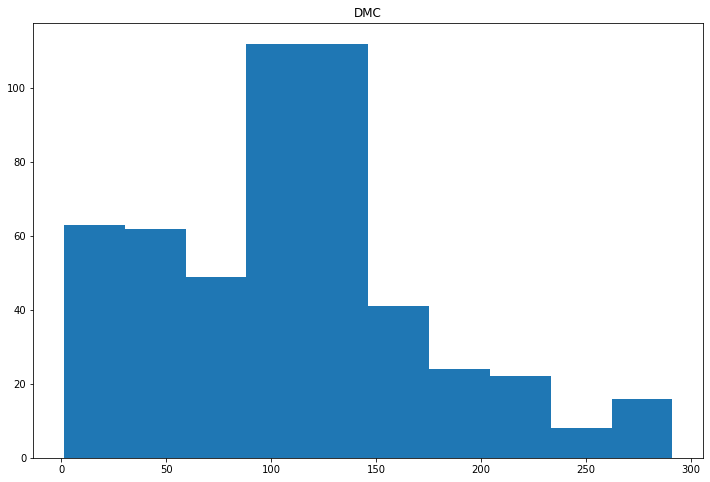

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('DMC')
plt.hist(data['DMC'])

(array([ 18.,  11.,  31.,  47.,  91., 122.,  98.,  54.,  24.,  13.]),
 array([ 2.2 ,  5.31,  8.42, 11.53, 14.64, 17.75, 20.86, 23.97, 27.08,
        30.19, 33.3 ]),
 <BarContainer object of 10 artists>)

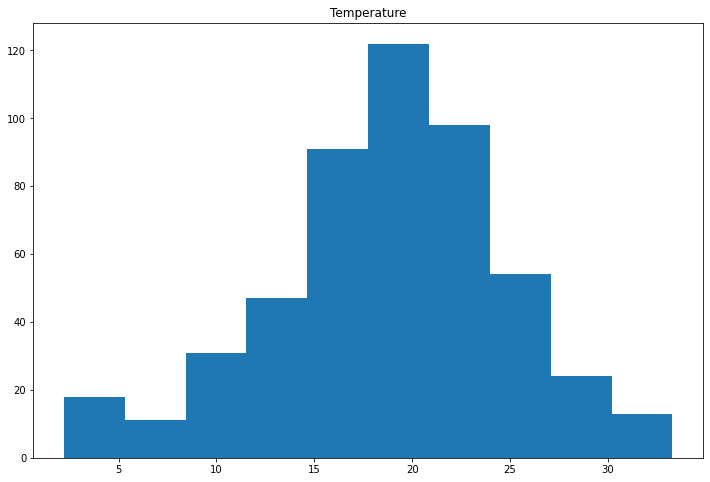

In [10]:
plt.figure(figsize=(12,8))
plt.title('Temperature')
plt.hist(data['temp'])

(array([ 21.,  95., 128., 102.,  62.,  38.,  31.,  20.,   7.,   5.]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <BarContainer object of 10 artists>)

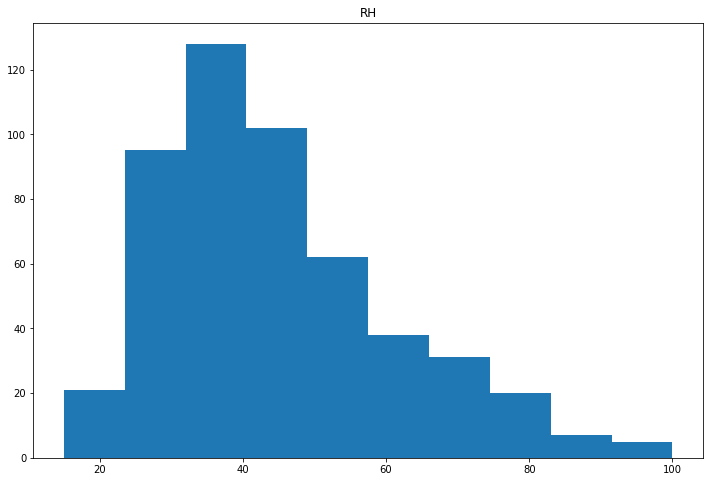

In [11]:
plt.figure(figsize=(12,8))
plt.title('RH')
plt.hist(data['RH'])

# `Plotting Boxplot to see Outliers`

<AxesSubplot:title={'center':'FFMC'}>

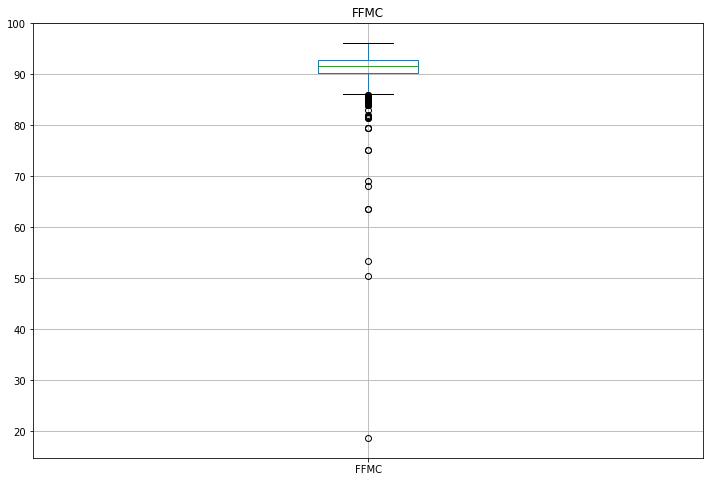

In [12]:
plt.figure(figsize=(12,8))
plt.title('FFMC')
data.boxplot(column=['FFMC'])

## `Plotting Boxplot`

<AxesSubplot:title={'center':'DMC'}>

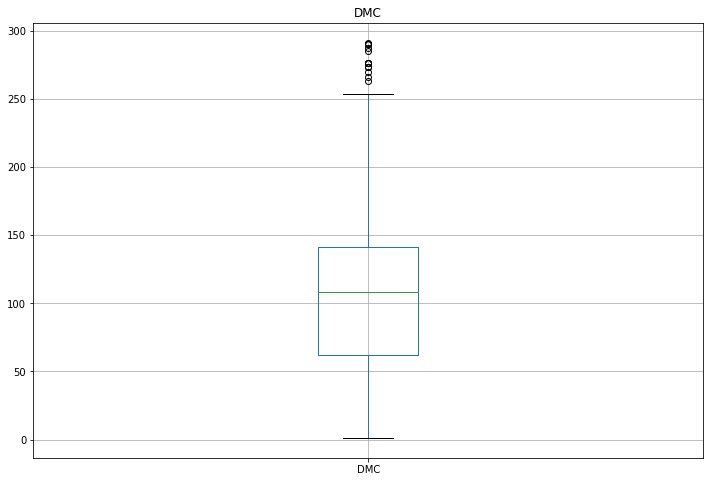

In [13]:
plt.figure(figsize=(12,8))
plt.title('DMC')
data.boxplot(column=['DMC'])

<AxesSubplot:title={'center':'Wind'}>

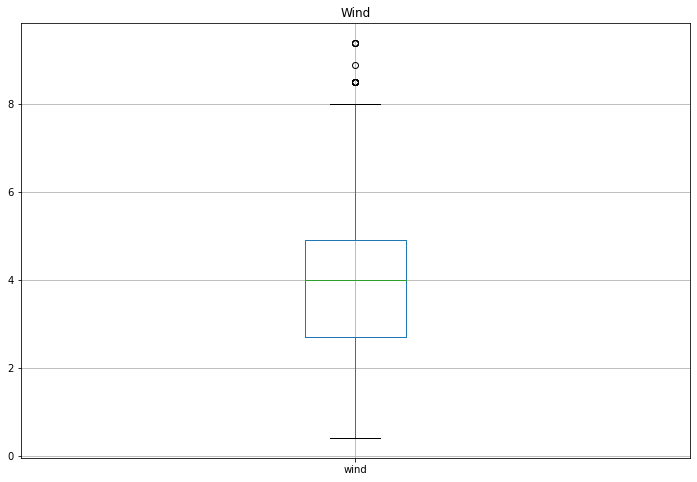

In [14]:
plt.figure(figsize=(12,8))
plt.title('Wind')
data.boxplot(column=['wind'])

## `Normalising the Data`

In [15]:
pred = data.iloc[:,2:28]
target = data.iloc[:,28]

# `Normalmization`

In [16]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
fires = norm_func(pred)
fires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

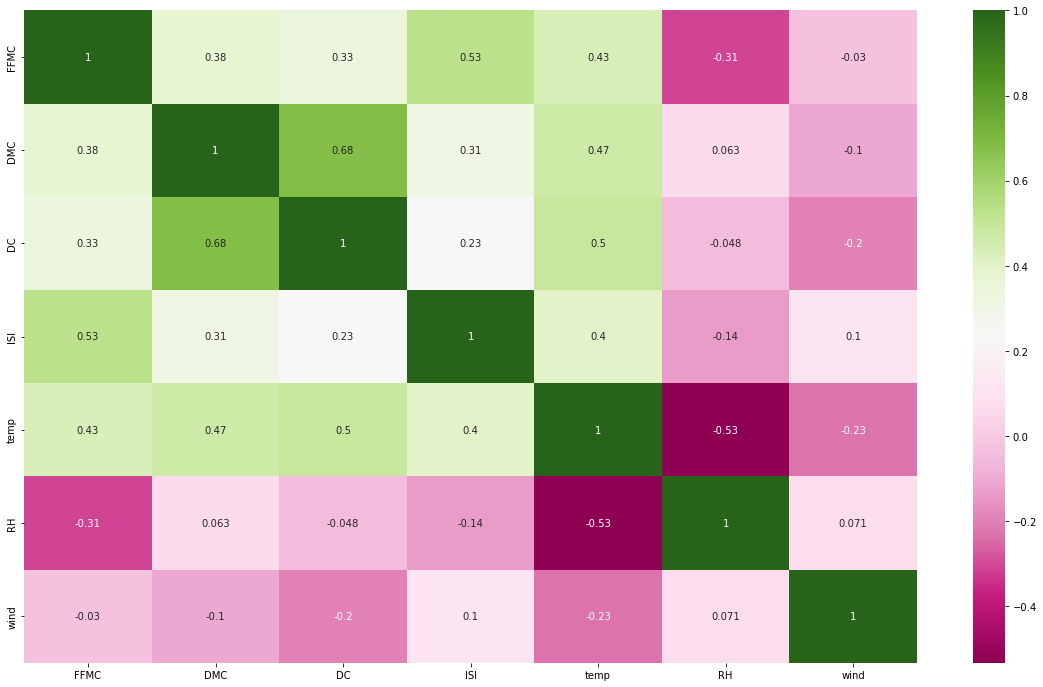

In [18]:
plt.figure(figsize=(20,12))
data_1=data.iloc[:,0:9]
cor = data_1.corr()
sns.heatmap(cor, annot=True, cmap= "PiYG")

In [19]:
x_train, x_test, y_train, y_test = train_test_split(pred,target, test_size = 0.25,stratify = target)

In [20]:
from sklearn.metrics import accuracy_score
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)* 100
print("Accuracy =", acc)

Accuracy = 96.875


# <span style ='background : yellow'> Kernel = Linear </span>

In [21]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear==y_test)

1.0

# <span style ='background : yellow'> Kernel = Poly </span>

In [22]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

np.mean(pred_test_poly==y_test)

0.96875

# <span style ='background : yellow'> Kernel = Rbf </span>

In [23]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

np.mean(pred_test_rbf==y_test) 

0.96875

# <span style ='background : yellow'> Kernel = Sigmoid </span>

In [24]:
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

np.mean(pred_test_sig==y_test)

0.96875

In [25]:
data = {"MODEL":pd.Series(["Model_Linear","Model_Ploy","Model_Rbf","Model_Sigmoid"]),"Values":pd.Series([np.mean(pred_test_linear==y_test)*100,
                np.mean(pred_test_poly==y_test)*100,np.mean(pred_test_rbf==y_test)*100,np.mean(pred_test_sig==y_test)*100])}
table=pd.DataFrame(data)
table.sort_values(['Values'])

,MODEL,Values
1,Model_Ploy,96.875
2,Model_Rbf,96.875
3,Model_Sigmoid,96.875
0,Model_Linear,100.000


### `We Are Getting Best Accuracy. `